<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/MBD_IAyAA_California_Housing_Actividad_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Analítica de Negocios**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

### **Preprocesamiento de datos numéricos y la Regresión Lineal con los datos California Housing Prices**

# **Acceso a los datos**

In [1]:
# Librerías básicas que estaremos requiriendo en la mayoría de las actividades.
# Recuerda usar el símbolo de # para documentar tu código dentro de estas celdas:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # para un mejor despliegue de los gráficos

Para este ejercicio usaremos los datos llamados "California Housing Prices", cuyo objetivo es predecir el precio de una casa en el estado de California, EEUU, de acuerdo a varias características dadas de la misma.


En esta primera actividad estaremos mostrando algunas de las técnicas que se pueden aplicar en el preprocesamiento de datos numéricos para un problema de regresión lineal múltiple y la interpretación de los resultados no solo del modelo final, sino también de cada proceso parcial.

### **Californa-Housing-Prices**:

Las siguientes ligas te llevan al artículo original de los autores que publicaron en 1997, donde explican el significado de cada variable y la manera en que generaron dicho conjunto de datos a partir del censo de 1990 en California:

https://www.sciencedirect.com/science/article/abs/pii/S016771529600140X

https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

Puedes obtener la información del artículo original también en la siguiente liga:

http://www.spatial-statistics.com/pace_manuscripts/spletters_ms_dir/statistics_prob_lets/pdf/fin_stat_letters.pdf

O bien, en esta liga de Kaggle también puedes accesar a los datos y a otra breve descripción del problema:

https://www.kaggle.com/datasets/camnugent/california-housing-prices

Por su parte, la librería de scikit-learn te permite también acceder a ellos a través de su paquete de datos previamente cargados y listos para utilizar, aunque en este caso no están separados en los dos archivos de entrenamiento y prueba:

https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

Sin embargo, no necesariamente todas las ligas nos llevan exactamente al mismo conjunto de datos. En algunos casos se tienen más o menos factores, o más o menos registros.

Para complementar esta actividad, te recomendamos la lectura del Capítulo 2, "End-to-End Machine Learning Project" del libro de Aurélien Géron, "Hands-On Machine learning with Scikit-Learn, Keras & TensorFlow", 3rd edition, 2022.

En particular este libro lo puedes accesar en la biblioteca digital del Tecnológico de Monterrey:  https://biblioteca.tec.mx/inicio siguiendo la ruta:

**Colecciones** $\rightarrow$ **Bases de datos** $\rightarrow$ **E** $\rightarrow$ **Ebooks O'Reilly**.


In [13]:
# Queremos accesar el archivo que está en la carpeta "sample_data" en la cual nos encontramos de manera
# predeterminada y que podemos verificar con el siguiente comando que nos permite listar sus archivos
# y directorios:

!ls

sample_data


In [14]:
# La siguiente instrucción nos permite adentrarnos en dicha carpeta y de nuevo listamos lo que hay dentro de ella:

#%cd sample_data/

!ls

sample_data


**NOTA-Opcional:** Si deseas conocer más sobre los principales comandos de Linux, puedes consultar la siguiente liga:

https://www.hostinger.mx/tutoriales/linux-comandos

In [20]:
# En particular, los datos para el entrenamiento los encontramos en el siguiente archivo, el cual procedemos a cargar:

datatrain = pd.read_csv("/content/sample_data/california_housing_train.csv", sep=",")
datatrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [18]:
# Procedemos de manera análoga para leer y cargar el archivo con los datos de Prueba:

datatest = pd.read_csv("/content/sample_data/california_housing_test.csv", sep=",")
datatest.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


De cualquier de las ligas dadas anteriormente sabemos que la variable de salida es el precio medio (mediana) de la casa en dólares estadounidenses, "median_house_value".

In [22]:
# Veamos la cantidad de datos que tenemos:

print('Dimensión datos de Entrenamiento:',
      datatrain.shape,
      '%.1f%%' % (100.*datatrain.shape[0]/(datatrain.shape[0]+datatest.shape[0])))

print('Dimensión datos de Prueba:',
      datatest.shape,
     '%.1f%%' % (100.*datatest.shape[0]/(datatrain.shape[0]+datatest.shape[0])))

Dimensión datos de Entrenamiento: (17000, 9) 85.0%
Dimensión datos de Prueba: (3000, 9) 15.0%


# **Conjuntos de Entrenamiento, Validación y Prueba**

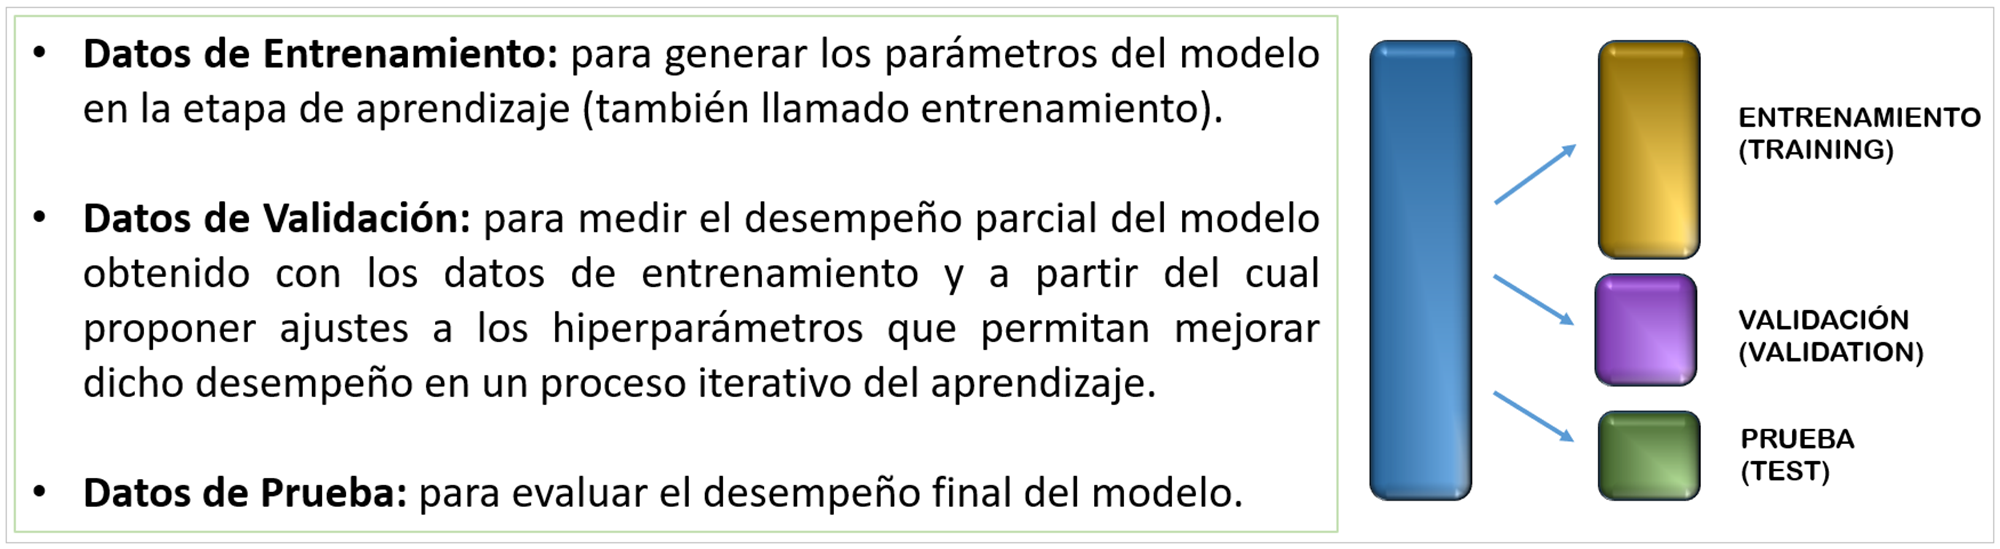

# 1 - Contesta las siguientes preguntas:

*   ### **¿Dónde están en este caso los datos del conjunto de "validación"? ¿En este caso no se requieren?**

*   ### **Decide cuál consideras un buen porcentaje para la partición de este ejemplo, al menos como primer propuesta, para los conjuntos de Entrenamiento, Validación y Prueba.**


### **Nota Importante: durante toda la etapa del preprocesamiento de los datos y en el entrenamiento de los modelos, toda la información que desees obtener y generar, deberá ser a partir del conjunto de Entrenamiento y no con los datos de los conjuntos de Validación o de Prueba. Esto para evitar el filtrado de información (data leakage)**






**NOTA-Opcional:** Si deseas conocer más sobre Validación-Cruzada, puedes consultar la documentación de scikit-kearn en la siguiente liga:

https://scikit-learn.org/stable/modules/cross_validation.html

In [23]:
# Separemos los factores de entrada y la variable de salida:

# Los datos para Entrenamiento y Validación:
Xtv = datatrain.iloc[:,:-1]
ytv = datatrain.iloc[:,-1]

# Los datos para Prueba:
Xtest = datatest.iloc[:,:-1]
ytest = datatest.iloc[:,-1]

# **2 - Contesta la siguiente pregunta:**

*   ### **Realiza una partición en tres conjuntos, entrenamiento, validación y prueba de manera que tengas aproximadamente la siguiente distribución: Train\~70%, Validation\~15%, Test\~15%.**

Puedes consultar la siguiente liga:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [24]:
from sklearn.model_selection import train_test_split

Xtrain, Xval, ytrain, yval = train_test_split(Xtv, ytv, test_size=0.18, random_state=1)

print(Xtrain.shape, '%.1f%%' % (100.*Xtrain.shape[0]/(Xtv.shape[0] + Xtest.shape[0])))
print(Xval.shape, '%.1f%%' % (100.*Xval.shape[0]/(Xtv.shape[0] + Xtest.shape[0]))),
print(Xtest.shape, '%.1f%%' % (100.*Xtest.shape[0]/(Xtv.shape[0] + Xtest.shape[0])))

print(ytrain.shape)
print(yval.shape)
print(ytest.shape)


(13940, 8) 69.7%
(3060, 8) 15.3%
(3000, 8) 15.0%
(13940,)
(3060,)
(3000,)


# Análisis descriptivo

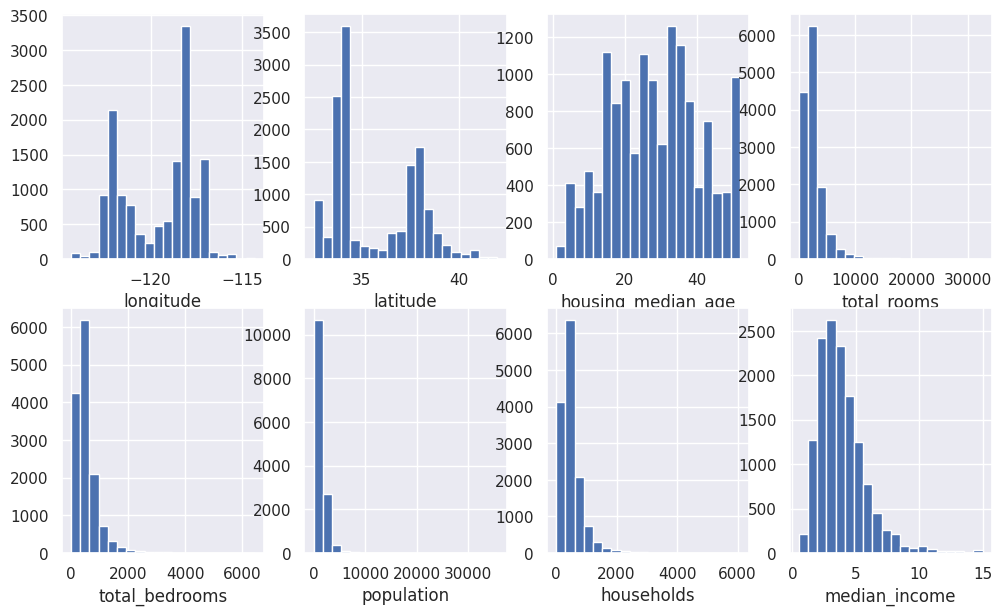

In [25]:
# Variables de entrada del conjnuto de Entrenamiento:

sns.set(rc={'figure.figsize':(12,7)})   # (width, height)

fig, axes = plt.subplots(2, 4)
for k in range(0,8):
  plt.subplot(2,4,k+1)
  plt.hist(Xtrain[Xtrain.columns[k]], bins=20)
  plt.xlabel(Xtrain.columns[k])
plt.show()

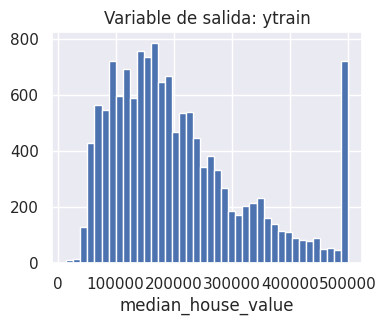

In [26]:
# Variable de salida del conjnuto de Entrenamiento:

sns.set(rc={'figure.figsize':(4,3)})
plt.hist(ytrain , bins=40)
plt.title('Variable de salida: ytrain')
plt.xlabel("median_house_value")
plt.show()

# **3 - Contesta las siguientes preguntas:**

*   ### **¿Por qué debemos graficar y analizar solamente los datos de Entrenamiento (Train)?**
*   ### **¿Qué tipo de sesgos o distribuciones observas en las variables tanto de entrada como de salida?**
*   ### **¿Qué tipo de transformación sugieres aplicar en las variables de entrada?**
*   ### **¿Qué tipo de transformación sugieres aplicar en la variable de salida?**
*   ### **¿Por qué se sugiere realizar las transformaciones en las variables de entrada? ¿y en la variable de salida?**
*   ### **¿La variable de salida "y" debe en general escalarse por ejemplo al intervalo de 0 a 1? ¿Por qué?**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### Veamos de manera más detallada las variables "longitude" y "latitude"

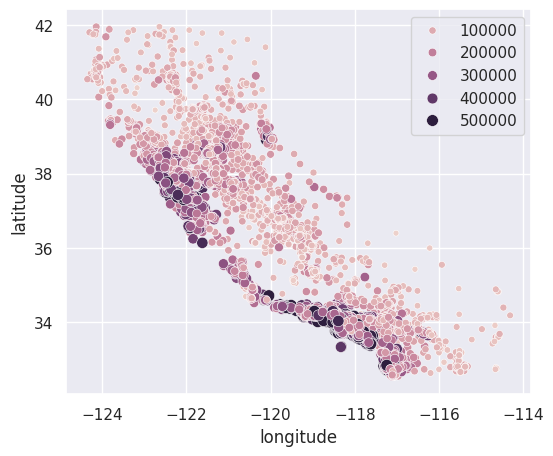

In [27]:
sns.set(rc={'figure.figsize':(6,5)})

sns.scatterplot(data=Xtrain,
                x="longitude",
                y="latitude",
                hue=ytrain.values,
                size=ytrain.values
                );

# 4 - Contesta la siguiente pregunta:

*   ### **Con base a la información obtenida ¿qué sugieres hacer con las variables "latitude" y "longitude"?**

# Transformación de variables

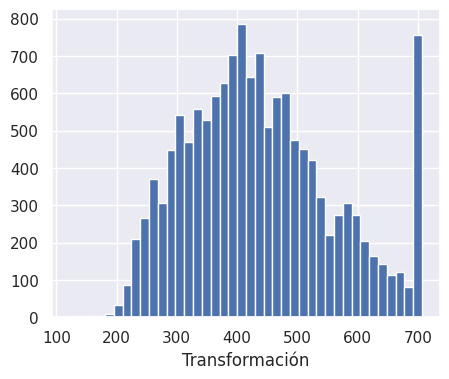

In [34]:
# Aplica la tranformación raíz o logaritmo y observa el comportamiento obtenido.
# ¿Cuál consideras que es la transformación más adecuada para la variable de salida?

sns.set(rc={'figure.figsize':(5,4)})

yy = np.power(ytrain, 1/2)   #  np.log, np.power, np.sqrt

plt.hist(yy, bins=40)
plt.xlabel("Transformación")
plt.show()

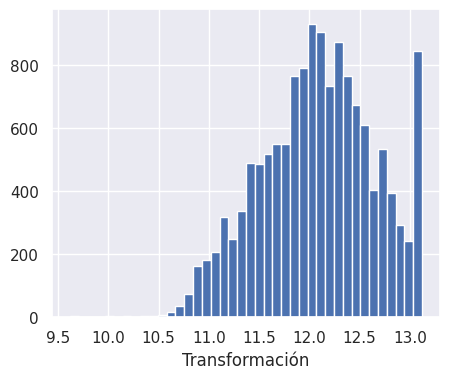

In [32]:
# Aplica la tranformación raíz o logaritmo y observa el comportamiento obtenido.
# ¿Cuál consideras que es la transformación más adecuada para la variable de salida?

sns.set(rc={'figure.figsize':(5,4)})

yy = np.log(ytrain)   #  np.log, np.power, np.sqrt

plt.hist(yy, bins=40)
plt.xlabel("Transformación")
plt.show()

In [29]:
# Escalando los datos de entrada en el intervalo [0,1].
# Usamos primero solamente los datos de Entrenamiento para
# evitar el filtrado de información:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

Xtrainsc = sc.fit_transform(Xtrain)

Xtrainsc = pd.DataFrame(Xtrainsc, columns=Xtrain.columns)
Xtrainsc.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.589641,0.181722,0.607843,0.074258,0.085377,0.064884,0.087171,0.216445
1,0.180279,0.574920,0.725490,0.070487,0.061627,0.027131,0.063158,0.358416
2,0.732072,0.010627,0.196078,0.094647,0.075598,0.038902,0.079276,0.308913
3,0.261952,0.580234,0.117647,0.243623,0.203508,0.124919,0.212336,0.307713
4,0.468127,0.483528,0.313725,0.038907,0.038963,0.019731,0.043586,0.210349


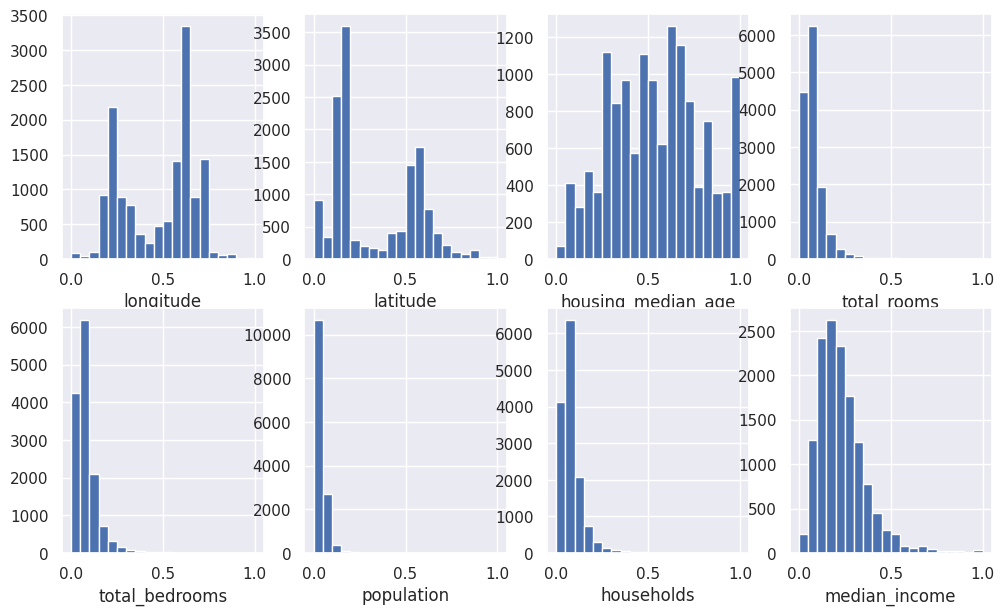

In [30]:
sns.set(rc={'figure.figsize':(12,7)})   # (width, height)
fig, axes = plt.subplots(2, 4)
for k in range(0,8):
  plt.subplot(2,4,k+1)
  plt.hist(Xtrainsc[Xtrainsc.columns[k]], bins=20)
  plt.xlabel(Xtrainsc.columns[k])
plt.show()

In [35]:
# Ahora escalamos los datos de Validación y de Prueba, usando
# la información/transformación obtenida de los datos de Entrenamiento:

Xvalsc = sc.transform(Xval)
Xvalsc = pd.DataFrame(Xvalsc, columns=Xval.columns)

Xtestsc = sc.transform(Xtest)
Xtestsc = pd.DataFrame(Xtestsc, columns=Xtest.columns)

# Incluye una línea de código para transformar la variable de entrada con la transformación que hayas considerado como la mejor en los datos de Entrenamiento:

In [41]:
def mi_fun(yy):
    tmp = np.power(yy, 1/3)  #  incluye la función que consideres más adecuada para transformar la variable de salida
    return tmp

In [42]:
ytrainsc = pd.DataFrame(mi_fun(ytrain))

ytrainsc = pd.DataFrame(ytrainsc, columns=pd.DataFrame(ytrain).columns)
ytrainsc.head()

,median_house_value
8108,54.209066
16388,75.810470
534,55.439997
12624,53.889578
9747,47.370840


In [43]:
# Una vez determinada la transformación a aplicar con el conjunto de Entrenamiento,
# hacemos lo mismo con los datos de Validación y de Prueba:

yvalsc = pd.DataFrame( mi_fun(yval) )
yvalsc = pd.DataFrame(yvalsc, columns=pd.DataFrame(yval).columns)

ytestsc = pd.DataFrame( mi_fun(ytest) )
ytestsc = pd.DataFrame(ytestsc, columns=pd.DataFrame(ytest).columns)

# **Generamos un modelo de Regresión Lineal Múltiple y verificamos su desempeño con los conjuntos de Entrenamiento y Validación:**

In [44]:
import statsmodels.api as sm   # Librería Statistical-Models para aplicar el modelo de regresión lineal ordinaria OLS:
                               # https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

In [45]:
mimodelo1 = sm.OLS(ytrainsc.values, sm.add_constant(Xtrainsc.values)).fit()

print(mimodelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     3316.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:23:28   Log-Likelihood:                -45478.
No. Observations:               13940   AIC:                         9.097e+04
Df Residuals:                   13931   BIC:                         9.104e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.1681      0.722    112.372      0.0

In [46]:
# Obtenemos las predicciones con los conjuntos de entrenamiento y de validación:

predTrain1 = mimodelo1.predict(sm.add_constant(Xtrainsc))
predVal1 = mimodelo1.predict(sm.add_constant(Xvalsc))

### **Definamos las métricas a utilizar en este problema de Regresión:**

In [50]:
# Raíz cuadrada del error cuadrático medio (RMSE):
rmse_train = np.sqrt(np.mean(np.square(predTrain1.values - ytrainsc.values.T), axis=1))[0]
rmse_val = np.sqrt(np.mean(np.square(predVal1.values - yvalsc.values.T), axis=1))[0]
#Mide todas las diferencias de la recta con la ecuación esperada real, las eleva al cuadrado y la suma.

# Error absoluto medio (MAE):
mae_train = np.mean(np.abs(predTrain1.values - ytrainsc.values.T), axis=1)[0]
mae_val = np.mean(np.abs(predVal1.values - yvalsc.values.T), axis=1)[0]

# Error porcentual absoluto medio (MAPE):
epsilon = np.finfo(float).eps
mape_train = 100. * np.mean(np.abs( (predTrain1.values - ytrainsc.values.T)/(ytrainsc.values.T + epsilon) ), axis=1)[0]
mape_val = 100. * np.mean(np.abs( (predVal1.values - yvalsc.values.T)/(yvalsc.values.T + epsilon) ), axis=1)[0]
#Hace un calculo porcentual que indica un porcentaje de error.

print('Desempeños del modelo de Regresión Lineal con Outliers:\n')
print('RMSE-Train1: %.2f' % rmse_train)
print('RMSE-Val1: %.2f' % rmse_val)

print('\nMAE-Train1: %.2f' % mae_train)
print('MAE-Val1: %.2f' % mae_val)

print('\nMAPE-Train1: %.2f%%' % mape_train)
print('MAPE-Val1: %.2f%%' % mape_val)

Desempeños del modelo de Regresión Lineal con Outliers:

RMSE-Train1: 6.32
RMSE-Val1: 6.14

MAE-Train1: 4.77
MAE-Val1: 4.68

MAPE-Train1: 8.62%
MAPE-Val1: 8.54%


# Finalmente obtenemos el desempeño del modelo con el conjunto de Prueba:

In [48]:
predTest = mimodelo1.predict(sm.add_constant(Xtestsc))

rmse_test = np.sqrt(np.mean(np.square(predTest.values - ytestsc.values.T), axis=1))[0]
mae_test = np.mean(np.abs(predTest.values - ytestsc.values.T), axis=1)[0]
mape_test = 100. * np.mean(np.abs( (predTest.values - ytestsc.values.T)/(ytestsc.values.T + epsilon) ), axis=1)[0]


print('RMSE-Test: %.2f' % rmse_test)
print('MAE-Test: %.2f' % mae_test)
print('MAPE-Test: %.2f%%' % mape_test)

RMSE-Test: 6.37
MAE-Test: 4.74
MAPE-Test: 8.53%


In [49]:
# [OPCIONAL] : Si deseamos la salida de RMSE y MAE en la misma escala de los datos originales:


# Raíz cuadrada del error cuadrático medio (RMSE):
invrmse_train = np.sqrt(np.mean(np.square(np.power(predTrain1.values,3) - np.power(ytrainsc.values.T,3)), axis=1))[0]
invrmse_val = np.sqrt(np.mean(np.square(np.power(predVal1.values,3) - np.power(yvalsc.values.T,3)), axis=1))[0]

# Error absoluto medio (MAE):
invmae_train = np.mean(np.abs(np.power(predTrain1.values,3) - np.power(ytrainsc.values.T,3)), axis=1)[0]
invmae_val = np.mean(np.abs(np.power(predVal1.values,3) - np.power(yvalsc.values.T,3)), axis=1)[0]

# Error porcentual absoluto medio (MAPE):
epsilon = np.finfo(float).eps
mape_train = 100. * np.mean(np.abs( (predTrain1.values - ytrainsc.values.T)/(ytrainsc.values.T + epsilon) ), axis=1)[0]
mape_val = 100. * np.mean(np.abs( (predVal1.values - yvalsc.values.T)/(yvalsc.values.T + epsilon) ), axis=1)[0]

print('Desempeños del modelo de Regresión Lineal con Outliers:\n')
print('RMSE-Train1: %.2f' % invrmse_train)
print('RMSE-Val1: %.2f' % invrmse_val)

print('\nMAE-Train1: %.2f' % invmae_train)
print('MAE-Val1: %.2f' % invmae_val)

print('\nMAPE-Train1: %.2f%%' % mape_train)
print('MAPE-Val1: %.2f%%' % mape_val)

Desempeños del modelo de Regresión Lineal con Outliers:

RMSE-Train1: 74099.07
RMSE-Val1: 69899.63

MAE-Train1: 49665.06
MAE-Val1: 47780.92

MAPE-Train1: 8.62%
MAPE-Val1: 8.54%


### **\<\<Fin de la actividad>>**